## Data Observations

As the tumor volume increases so does the tumor weight for the capomulin regimen.

As time increases the tumor volume decreases under the capomulin regimen.

The median final tumor volume after being treated with the four regimens of interest is 45 mm^3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_results = pd.merge(mouse_metadata,study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_mouse_results.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Check the number of mice.
mouse_count = combined_mouse_results['Mouse ID'].count()
mouse_count

1893

In [3]:
# Show the duplicate mice by ID number 
mouse_dup_idtp = combined_mouse_results
mouse_dup_idtp = mouse_dup_idtp.sort_values(by=['Mouse ID','Timepoint'],ascending=False)
mouse_dup_idtp = mouse_dup_idtp.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
mouse_dup_idtp

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1892     z969     Naftisol    Male           9          30         45   
1891     z969     Naftisol    Male           9          30         40   
1890     z969     Naftisol    Male           9          30         35   
1889     z969     Naftisol    Male           9          30         30   
1888     z969     Naftisol    Male           9          30         25   
...       ...          ...     ...         ...         ...        ...   
458      a203    Infubinol  Female          20          23         20   
457      a203    Infubinol  Female          20          23         15   
456      a203    Infubinol  Female          20          23         10   
455      a203    Infubinol  Female          20          23          5   
454      a203    Infubinol  Female          20          23          0   

      Tumor Volume (mm3)  Metastatic Sites  
1892           73.867845                 4  
1891           70.314904                 4  
1890           69.176246                 4  
1889           65.841013                 3  
1888           63.145652                 2  
...                  ...               ...  
458            55.173336                 1  
457            52.777870                 1  
456            51.852437                 1  
455            48.508468                 0  
454            45.000000                 0  

[1888 rows x 8 columns]

In [4]:
# dropping the duplicate mouse by its ID.
dups_of_df = mouse_dup_idtp
mouse_dup_idtp = mouse_dup_idtp.sort_values(by=['Mouse ID','Timepoint'],ascending=False)
dups_of_df = dups_of_df.drop_duplicates(subset='Mouse ID',keep='first')
dups_of_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1892     z969     Naftisol    Male           9          30         45   
1882     z795     Naftisol  Female          13          29         45   
1872     z581    Infubinol  Female          24          25         45   
84       z578     Ramicane    Male          11          16         45   
1862     z435     Propriva  Female          12          26         10   

      Tumor Volume (mm3)  Metastatic Sites  
1892           73.867845                 4  
1882           65.741070                 3  
1872           62.754451                 3  
84             30.638696                 0  
1862           48.710661                 0

In [5]:
# Checking the number of mice in the clean DataFrame.
count_mouseid = dups_of_df['Mouse ID']
count_mouseid = count_mouseid.count()
count_mouseid_tp = mouse_dup_idtp['Mouse ID']
count_mouseid_tp = count_mouseid_tp.count()

print('Number of mice in dataframe with removed duplicates of Mouse ID and Timepoint:', count_mouseid_tp)
print('Number of mice in dataframe with removed duplicates of Mouse ID:', count_mouseid)


Number of mice in dataframe with removed duplicates of Mouse ID and Timepoint: 1888
Number of mice in dataframe with removed duplicates of Mouse ID: 249


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_df = dups_of_df[["Drug Regimen",'Tumor Volume (mm3)']]
drug_regimen_df.head()

drug_regimen_mean = drug_regimen_df.groupby('Drug Regimen').mean()
drug_regimen_mean.rename(columns={'Tumor Volume (mm3)':'Mean'},inplace=True)
drug_regimen_median = drug_regimen_df.groupby('Drug Regimen').median()
drug_regimen_median.rename(columns={'Tumor Volume (mm3)':'Median'},inplace=True)
main_stat_data = pd.merge(drug_regimen_mean, drug_regimen_median,left_on=['Drug Regimen'],right_on=['Drug Regimen'])

drug_regimen_var = drug_regimen_df.groupby('Drug Regimen').var()
drug_regimen_var.rename(columns={'Tumor Volume (mm3)':'Variance'},inplace=True)
main_stat_data = pd.merge(main_stat_data, drug_regimen_var,left_on=['Drug Regimen'],right_on=['Drug Regimen'])


drug_regimen_std = drug_regimen_df.groupby('Drug Regimen').std()
drug_regimen_std.rename(columns={'Tumor Volume (mm3)':'STD'},inplace=True)
main_stat_data = pd.merge(main_stat_data, drug_regimen_std,left_on=['Drug Regimen'],right_on=['Drug Regimen'])


drug_regimen_sem = drug_regimen_df.groupby('Drug Regimen').sem()
drug_regimen_sem.rename(columns={'Tumor Volume (mm3)':'SEM'},inplace=True)
main_stat_data = pd.merge(main_stat_data, drug_regimen_sem,left_on=['Drug Regimen'],right_on=['Drug Regimen'])

main_stat_data

Mean     Median    Variance        STD       SEM
Drug Regimen                                                       
Capomulin     36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin      57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol     58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril      62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol      61.205757  63.283288  106.029927  10.297083  2.059417
Placebo       60.508414  62.030594   78.759797   8.874672  1.774934
Propriva      56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane      36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn      61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol     59.181258  61.840058   76.862027   8.767099  1.753420

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df = dups_of_df[["Drug Regimen",'Tumor Volume (mm3)']]
drug_regimen_df = drug_regimen_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

drug_regimen_df

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

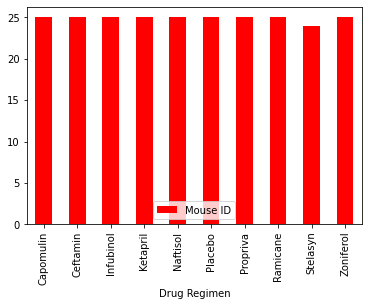

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_tested = dups_of_df[['Drug Regimen','Mouse ID']]
unique_mice_tested = unique_mice_tested.groupby('Drug Regimen').count()
unique_mice_tested.plot(kind='bar',facecolor='red')

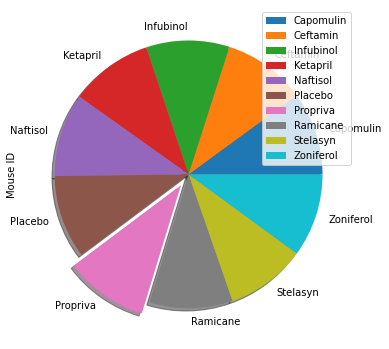

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
explode=(0,0,0,0,0,0,0.1,0,0,0)
unique_mice_tested.plot.pie(y='Mouse ID', figsize=(6, 40),shadow=True,explode=explode)

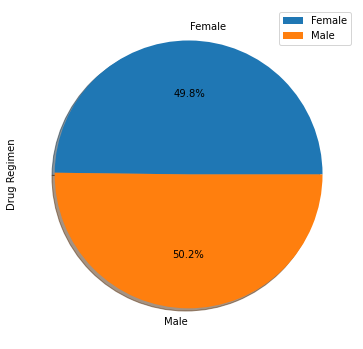

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice_sex = dups_of_df[['Drug Regimen','Sex']]
unique_mice_sex = unique_mice_sex.groupby('Sex').count()
unique_mice_sex.plot.pie(y='Drug Regimen', figsize=(6, 40),autopct='%1.1f%%',shadow=True)

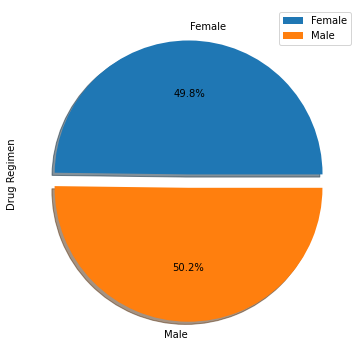

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0,0.1)
unique_mice_sex.plot.pie(y='Drug Regimen', figsize=(6, 40),autopct='%1.1f%%',explode=explode,shadow=True)

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drugs = dups_of_df[['Mouse ID',"Drug Regimen",'Tumor Volume (mm3)']]

indexNames = four_drugs[ four_drugs['Drug Regimen'] == 'Zoniferol' ].index
four_drugs.drop(indexNames , inplace=True)
indexNames2 = four_drugs[ four_drugs['Drug Regimen'] == 'Ketapril' ].index
four_drugs.drop(indexNames2 , inplace=True)
indexNames3 = four_drugs[ four_drugs['Drug Regimen'] == 'Naftisol' ].index
four_drugs.drop(indexNames3 , inplace=True)
indexNames4 = four_drugs[ four_drugs['Drug Regimen'] == 'Placebo' ].index
four_drugs.drop(indexNames4 , inplace=True)
indexNames5 = four_drugs[ four_drugs['Drug Regimen'] == 'Propriva' ].index
four_drugs.drop(indexNames5 , inplace=True)
indexNames6 = four_drugs[ four_drugs['Drug Regimen'] == 'Stelasyn' ].index
four_drugs.drop(indexNames6 , inplace=True)

four_drugs = four_drugs.sort_values(by=['Mouse ID','Drug Regimen'],ascending=True)

four_drugs

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Mouse ID Drug Regimen  Tumor Volume (mm3)
463      a203    Infubinol           67.973419
473      a251    Infubinol           65.525743
493      a275     Ceftamin           62.999356
327      a411     Ramicane           38.407618
430      a444     Ramicane           43.047543
...       ...          ...                 ...
1845     y769     Ceftamin           68.594745
124      y793    Capomulin           31.896238
1855     y865     Ceftamin           64.729837
84       z578     Ramicane           30.638696
1872     z581    Infubinol           62.754451

[100 rows x 3 columns]

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

iqr_data = four_drugs['Tumor Volume (mm3)']
iqr_data = iqr_data.sort_values(ascending=True)
IQR = stats.iqr(iqr_data, interpolation = 'midpoint') 
print('IQR: ',IQR,'showing that there are no outliers because an outlier is point which falls 1.5 times above the quartile range')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
four_drugs

    # add subset 
    # Determine outliers using upper and lower bounds
    
# First quartile (Q1) 
Q1 = np.median(iqr_data[:49]) 
print('Q1:',Q1)

# Third quartile (Q3) 
Q3 = np.median(iqr_data[99:])  
print('Q3: ',Q3)


#define lower and upper limit for the outlier for loop    
low_lim = Q1 - (1.5 * IQR) 
up_lim = Q3 + (1.5 * IQR)
print('low_limit is', low_lim) 
print('up_limit is', up_lim)  

#find the outlier
outlier =[] 
for x in iqr_data: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print('Outlier in the dataset is', outlier)

IQR:  22.858730715000007 showing that there are no outliers because an outlier is point which falls 1.5 times above the quartile range
Q1: 37.07402422
Q3:  72.2267309
low_limit is 2.7859281474999875
up_limit is 106.51482697250002
Outlier in the dataset is []


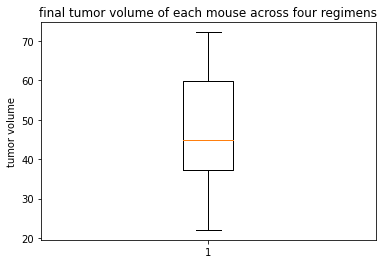

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = iqr_data
fig1, axl = plt.subplots()
axl.set_title('final tumor volume of each mouse across four regimens')
axl.set_ylabel('tumor volume')
axl.boxplot(tumor_data)
plt.show()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


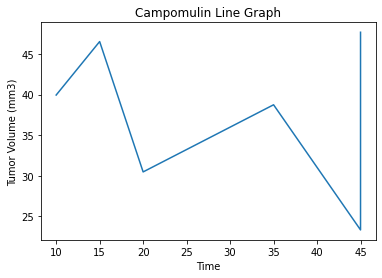

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
campomulin_data = dups_of_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint','Weight (g)']]

index_Names = campomulin_data[ campomulin_data['Drug Regimen'] == 'Ceftamin' ].index
campomulin_data.drop(index_Names , inplace=True)
index_Names2 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Infubinol' ].index
campomulin_data.drop(index_Names2 , inplace=True)
index_Names2 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Ramicane' ].index
campomulin_data.drop(index_Names2 , inplace=True)
indexNames = campomulin_data[ campomulin_data['Drug Regimen'] == 'Zoniferol' ].index
campomulin_data.drop(indexNames , inplace=True)
indexNames2 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Ketapril' ].index
campomulin_data.drop(indexNames2 , inplace=True)
indexNames3 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Naftisol' ].index
campomulin_data.drop(indexNames3 , inplace=True)
indexNames4 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Placebo' ].index
campomulin_data.drop(indexNames4 , inplace=True)
indexNames5 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Propriva' ].index
campomulin_data.drop(indexNames5 , inplace=True)
indexNames6 = campomulin_data[ campomulin_data['Drug Regimen'] == 'Stelasyn' ].index
campomulin_data.drop(indexNames6 , inplace=True)

campomulin_data

campo_vol_tp = campomulin_data[['Tumor Volume (mm3)','Timepoint']]

campo_vol_tp = campo_vol_tp.sort_values(by=['Timepoint','Tumor Volume (mm3)'],ascending=True)

plt.title('Campomulin Line Graph')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(campo_vol_tp['Timepoint'], campo_vol_tp['Tumor Volume (mm3)'])


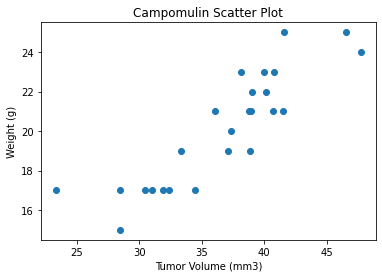

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
campo_vol_weight = campomulin_data[['Tumor Volume (mm3)','Weight (g)']]
campo_vol_weight = campo_vol_weight.groupby('Tumor Volume (mm3)').mean()

campo_weight = campomulin_data['Weight (g)']
campo_vol = campomulin_data['Tumor Volume (mm3)']

plt.title('Campomulin Scatter Plot')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.scatter(campo_vol, campo_weight)
plt.show()

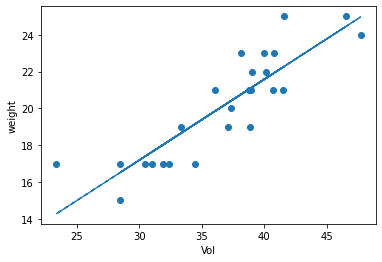

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(campo_vol, campo_weight)
aa_fit = aa_slope * campo_vol + aa_int
plt.scatter(campo_vol,campo_weight)
plt.plot(campo_vol,aa_fit,"--")
plt.xlabel('Vol')
plt.ylabel('weight')
plt.show()